---
title: Homework 1
subtitle: "ME 2060: Numerical Methods"
date: 2025-01-20
venue: Homeworks
exports:
  - format: pdf
    template: arxiv_nips
    link: https://jacob-cunningham-ds.github.io/me2060/hw1-code-cunningham
    output: ../assets/hw1_cunningham.pdf
downloads:
  - file: ../assets/ME_2060_HW_1.pdf
    title: ME_2060_HW_1.pdf
  - file: ../assets/hw1_cunningham.pdf
    title: hw1_cunningham.pdf
  - file: hw1_code_cunningham.ipynb
    title: hw1_code_cunningham.ipynb
abstract: |
  Homework discussion, calculations, and answers are provided herein.
---

## Effects of roundoff and truncation errors on numerical accuracy

The one-sided finite difference scheme to approximate the first derivative of a function $f$ is defined as:

$$
\label{equ-osfd}
\begin{equation}
  f_{h}(x) = \frac{f(x + h) - f(x)}{h} \approx f'(x),
\end{equation}
$$

where $h$ is the step size if no roundoff error exists, then the accuracy of the scheme is dermined soley by **truncation error**

$$
\label{equ-truncation-error}
\begin{equation}
  t_{e}(h) = | f'(x) - f_{h}(x) | = \mathscr{O}(h),
  \quad
  f'(x) = f_{h}(x) + \mathscr{O}(h),
\end{equation}
$$

where the big $\mathscr{O}$ - notation means there exists a constant $K$ such that $\mathscr{O} < K \cdot h$ for all $h$. In the presence of roundoff errors, $x$ cannot be represented exactly; instead, it is represented by the rounded value $\tilde{x}$ with the associated roundoff error $r = |\tilde{x} - x |$.

### Part A

Show that the total error of the finite-difference approximation consists of both truncation error $t_{e}(h)$ due to the finite-difference scheme and the roundoff error $r$:

$$
\label{equ-fd-error}
\begin{equation}
  \epsilon (h) := |f'(x) - f_{h}(\tilde{x})| = \mathscr{O}(h) + \frac{r}{h}
\end{equation}
$$

**Hint**: Start from $f'(x) = f_{h}(x) + \mathscr{O}(h)$, and consider that the computation of the finite difference $f_{h}(x)$ approximation already involves roundoff errors, e.g., $f(x) = \tilde{f}(x) + r$, $f(x + h) = \tilde{f}(x) + h + r$.

___

When accounting for rounding error, the computed version of [Equation (%s)](#equ-osfd) is:

$$
\label{equ-1A-calc-1}
\begin{equation}
  \tilde{f}_{h}(x) = \frac{\tilde{f}(x + h) - \tilde{f}(x)}{h},
\end{equation}
$$

where $\tilde{f}(x + h)$ and $\tilde{f}(x)$ are the computed values of $f(x + h)$ and $f(x)$, respectively. Since the computed values are equal to the exact values plus rounding error, [Equation (%s)](#equ-1A-calc-1) can be reduced:

$$
\begin{equation*}
\begin{align*}
  \tilde{f}_{h}(x) &= \frac{(f(x + h) + r_1) - (f(x) + r_2)}{h} \\
  &= \frac{f(x + h) - f(x) + (r_1 - r_2)}{h} \\
  &= \frac{f(x + h) - f(x)}{h} + \frac{r_1 - r_2}{h} \\
  &= f_{h}(x) + \frac{r_1 - r_2}{h}
\end{align*}
\end{equation*}
$$

This can be rewritten as:

$$
\label{equ-1A-calc-2}
\begin{equation}
  \tilde{f}_h(x) = f_{h}(x) + \frac{r}{h},
\end{equation}
$$

where $r = r_1 - r_2$.

The important step here is to realize that the rounding errors at $\tilde{f}(x + h)$ and $\tilde{f}(x)$ are not necessarily the same value. Substituting [Equation (%s)](#equ-1A-calc-2) into [Equation (%s)](#equ-truncation-error) gives:

$$
\begin{equation*}
\begin{align*}
  f'(x) &= (\tilde{f}_{h}(x) - \frac{r}{h}) + \mathscr{O}(h) \\
  &= \tilde{f}_{h}(x) - \frac{r}{h} + \mathscr{O}(h)
\end{align*}
\end{equation*}
$$

Since rounding error would add error contribution the result can be rewritten as:

$$
\label{equ-1A-calc-3}
\begin{equation}
  f'(x) = \tilde{f}_{h}(x) + \frac{r}{h} + \mathscr{O}(h)
\end{equation}
$$

The difference between the exact derivative and the computed derivative using this scheme is thus:

$$
\begin{equation*}
  f'(x) - \tilde{f}_{h}(x) = \mathscr{O}(h) + \frac{r}{h}
\end{equation*}
$$

Since both error contributions are always positive:

$$
\label{equ-1A-calc-4}
\begin{equation}
  |f'(x) - \tilde{f}_{h}(x) | = \mathscr{O}(h) + \frac{r}{h},
\end{equation}
$$

which is equivalent to [Equation (%s)](#equ-fd-error).

:::{important} Answer 1A
The deriviation above shows how [Equation (%s)](#equ-osfd) can be written as [Equation (%s)](#equ-1A-calc-1) when accounting for rounding error. [Equation (%s)](#equ-1A-calc-1) was reduced to [Equation (%s)](#equ-1A-calc-2) and substituted into [Equation (%s)](#equ-truncation-error) to give [Equation (%s)](#equ-1A-calc-3) which was rearranged to [Equation (%s)](#equ-1A-calc-4) and is equivalent to [Equation (%s)](#equ-fd-error).
:::

### Part B

From Part A, what can you say about the numerical accuracy of the finite difference scheme as the step size $h$ is continually decreased?

___

:::{important} Answer 1B
The roundoff error term $r/h$ will dominate and roundoff errors will be amplified. Conversely if $h$ is increased the truncation error term will dominante. This implies that there is probably an optimal step size to balance both error terms.
:::

### Part C

The second order central difference approximation is defined as

$$
\begin{equation}
  f_{h}^{c}(x) = \frac{f(x + h) - f(x - h)}{2h} \approx f'(x)
\end{equation}
$$

and has a truncation error of $t_{e}(h) = |f'(x) - f_{h}^{c}(x) | = \mathscr{O}(h^2)$.

Within the notebook `Week2_FD_students.ipynb` available on Canvas Module 1, add a function to evaluate the finite difference approximation $f_{h}^{c}$ for the derivative of $f(x) = \sin (x)$ with step size $h$ at a fixed $x = x_0 = 1$. For the same array $h$ of step sizes as in the notebook, calculate the array consisting of errors between the finite difference approximation $f_{h}^{c}$ and the exact dervative $f'$. Plot the approximation error for the central differences scheme as a function of step size $h$. Display your plot in log format in addition tot he previous plot for forward differences.

___

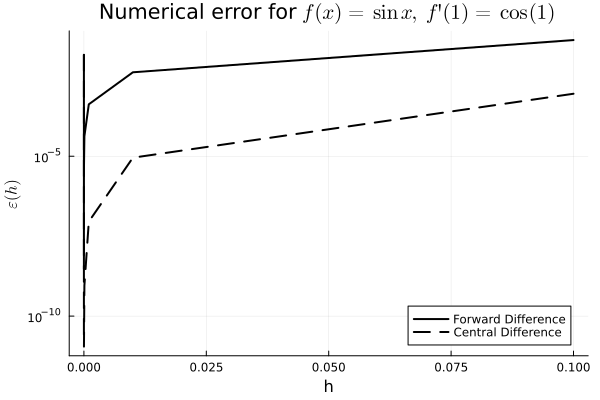

In [34]:
# Packages used
import Plots as plt
import LaTeXStrings as ltx

# One-sided finite difference approximation
function fh(x::Real, h::Vector{<:Real}, f::Function)
    return (f.(x .+ h) .- f.(x)) ./ h
end

# Second order central difference approximation
function fch(x::Real, h::Vector{<:Real}, f::Function)
    return (f.(x .+ h) .- f.(x .- h)) ./ (2 * h)
end

# Total error (note rounding error implicitly included)
function ϵ(f_exact::Real, f_num::Vector{<:Real})
        return abs.(f_exact .- f_num)
end

# Fixed x and same h array
x = 1.0
n= 1:15
h=10.0 .^ -n

# Numerical derivatives
fh_sin = fh(x, h, sin)
fch_sin = fch(x, h, sin)

# Exact derivative
f_deriv_sin = cos(x)

# Total errors
ϵ_fh_sin = ϵ(f_deriv_sin, fh_sin)
ϵ_fhc_sin = ϵ(f_deriv_sin, fch_sin)

# Plots
plt.plot(h, ϵ_fh_sin,
    yaxis=:log10,
    label="Forward Difference",
    lc=:black, lw=2, ls=:solid)

plt.plot!(h, ϵ_fhc_sin,
    yaxis=:log10,
    label="Central Difference",
    lc=:black, lw=2, ls=:dash)

plt.plot!(legend=:bottomright)
plt.title!(ltx.L"Numerical error for $f(x) = \sin{x},\; f'(1) = \cos(1)$")
plt.xlabel!("h")
plt.ylabel!(ltx.L"$\epsilon (h)$")

:::{important} Answer 1C
The figure above shows that the central difference scheme is superior to the forward difference scheme.
:::

### Part D

Now repeat the same above steps for the function $g(x) = \sin (100x)$ and its derivative $g'(x)$. Add your plots for the forward difference and central difference numerical errors to the same plot. Make sure to use a different linestyle, and specify your legend entries. Looking at your plot, what can you say about the accuracy of each method to approximate the derivative for $\sin (x)$ and $\sin (100x)$ at $x_{0} = 1$? Can you explain why?

:::{important} Answer 1D
Answer goes here.
:::

## Errors in Scientific Computing

The sine function is given by the infinite series

$$
\begin{equation}
  \sin x = x - \frac{x^3}{3!} + \frac{x^5}{5!} -\frac{x^7}{7!} + \cdots
\end{equation}
$$

### Part A

Calculate the forward and backward errors if we approximate the sine function by using only the first term in the series for $x = 0.1, \; 0.5, \; 1.0$.

:::{important} Answer 2A
Answer goes here.
:::

### Part B

Calculate the forward and backward errors if we approximate the sine function by using only the first two terms in the series for $x = 0.1, \; 0.5, \; 1.0$.

:::{important} Answer 2B
Answer goes here.
:::

## Condition Number & Stability

This is Exercise 1 from Section 1.4, page 26 of @driscoll. Exercises are also available at the end of each section of a chapter in the online textbook. Refer to your textbook for cross-referenced equations and tables.

Consider the formulas

$$
\begin{equation}
  f(x) = \frac{1 - \cos x}{\sin x},
  \quad
  g(x) = \frac{2 \sin^2 x/2}{\sin x},
\end{equation}
$$

which are mathematically equivalent, but they suggest evaluation alrogirthms that can behave quite differently in floating point arithmetic.

### Part A

Using (1.2.6), find the relative condition number of $f$. Note that because $f$ & $g$ are mathematically equivalent, their condition numbers are the same. Show that the condition number approaches to $1$ as $x \to 0$, which means it is possible to compute the function accurately near zero.

:::{important} Answer 3A
Answer goes here.
:::

### Part B

Compute $f(10^{-6})$ using a sequence of four elementary operations. Using Table 1.1 on page 13, make a table like the one shown in Demo 1.4.1 in the book that shows the result of each elementary result and the numerical value of the condition number of that step.

:::{important} Answer 3B
Answer goes here.
:::

### Part C

Repeat Part B for $g(10^{-6})$, which has six elementary steps.

:::{important} Answer 3C
Answer goes here.
:::

### Part D

Based on your answers to Part B & C, is $f(10^{-6})$ or $g(10^{-6})$ more accurate (provide your answer as Markdown text in your Jupyter notebook)?

:::{important} Answer 3D
Answer goes here.
:::

## Floating Point Arithmetic

Create an example calculation to demonstrate that floating point addition is not associative. Repeat the exercise for floating point multiplication.

:::{important} Answer 4
Answer goes here.
:::